# End-to-End Pipeline Development, Deployment, and MLOps

questions:
    1. tuye setup 2 ta comment kardam. chera kar nakard
    2. y cell ahs ke s[0].column ro bayad nemayesh bede vase man nadad
    3. bekhunam dar mored setup pycaret
    4. ba sckit khodam bezanam hamin to (Future)

Our objective is to build and deploy a web application where the demographic and health information of a patient is entered into a web-based form which then outputs a predicted charge amount.


In [2]:
# Import libraries
import numpy as np
import pandas as pd
from pycaret.regression import *
import requests


In [4]:
# Load data

path = "./Practicing MLOPS/insurance.csv"
insurance = pd.read_csv(path)
print(insurance)



      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [5]:
#  initiate the pycaret env
s1 = setup(insurance, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, 
#            trigonometry_features = True,
#            feature_interaction=True,
           bin_numeric_features= ['age', 'bmi'])


,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [6]:
# s1[0].columns

In [7]:
# train a model
lr = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3036.3356,21688655.1655,4657.1080,0.8705,0.3980,0.3163
1,3396.9874,32749652.4740,5722.7312,0.8096,0.4437,0.3116
2,3093.4780,23029992.1697,4798.9574,0.7084,0.5106,0.3983
3,2967.8035,20825583.8772,4563.5057,0.8261,0.4590,0.3874
4,3160.6305,28204374.9614,5310.7791,0.7902,0.5191,0.2983
5,3178.3925,24132485.3356,4912.4826,0.8448,0.4470,0.3132
6,2757.6851,21726371.0331,4661.1555,0.8522,0.3732,0.2986
7,3402.7368,29754978.3666,5454.8124,0.8364,0.4536,0.2928
8,3240.6564,24661771.7783,4966.0620,0.8407,0.4657,0.3374


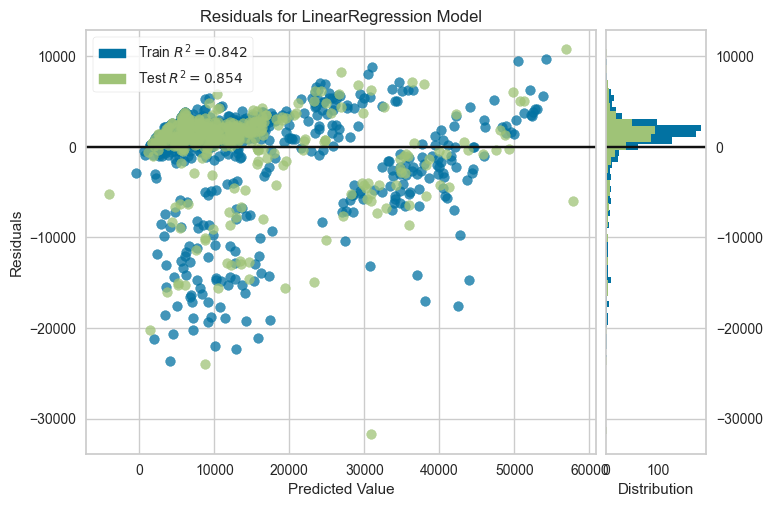

In [8]:
# Plot the model

plot_model(lr)

In [9]:
# save pipeline/model
save_model(lr, model_name = './Practicing MLOPS/pycaret_deployment')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                 

A web application that can read our trained pipeline, to predict new data points

In [3]:
# Load teh mdoel


model = load_model('./Practicing MLOPS/pycaret_deployment')

# To see the pipeline and model
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])

In [4]:
# Create a sample input as a dictionary
sample_input = {
    'age': 30,
    'sex': 'female',
    'bmi': 25.5,
    'children': 2,
    'smoker': 'yes',
    'region': 'southeast'
}

# Convert the sample input dictionary to a DataFrame
sample_input_df = pd.DataFrame([sample_input])

# Ensure the DataFrame columns match your model's feature names
# You might need to adjust this part to match your actual feature names
sample_input_df = sample_input_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]



# model = load_model('./Practicing MLOPS/pycaret_deployment')
predicted_result = predict_model(model, data=sample_input_df)

In [5]:
sample_input_df

,age,sex,bmi,children,smoker,region
0,30,female,25.5,2,yes,southeast


In [6]:
predicted_result

,age,sex,bmi,children,smoker,region,prediction_label
0,30,female,25.5,2,yes,southeast,20458.953132


In [7]:
prediction_value = predicted_result['prediction_label'][0]
print(f'Predicted Value: {prediction_value}')

Predicted Value: 20458.95313238213
